In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgbm
from ggplot import *
from seaborn import *
import seaborn as sns; sns.set()

C:\Users\rohit\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
ensemble_dataset_reg = pd.DataFrame(columns = ['accuracy_linear', 'accuracy_lin_rf_ensemble', 'accuracy_lin_rf_gbm_ensemble', 
                                'accuracy_lin_rf_gbm_xgb_ensemble', 'accuracy_lin_rf_gbm_xgb_lgbm_ensemble', 'num_rows',
                                'num_cols'])

ensemble_dataset_clf = pd.DataFrame(columns = ['accuracy_logistic', 'accuracy_log_rf_ensemble', 'accuracy_log_rf_gbm_ensemble', 
                                'accuracy_log_rf_gbm_xgb_ensemble', 'accuracy_log_rf_gbm_xgb_lgbm_ensemble', 'num_rows',
                                'num_cols'])

In [3]:
import glob
x = glob.glob(r'C:\Users\rohit\Desktop\MSc. Computer Science - Data Science\Machine Learning\Group project\datasets\regression\*.csv')
y = glob.glob(r'C:\Users\rohit\Desktop\MSc. Computer Science - Data Science\Machine Learning\Group project\datasets\classification\*.csv')

In [4]:
for i in range(0,len(x)):
    dataset = pd.read_csv(x[i])
    
    #Dropping all NA rows
    dataset= dataset.dropna()

    # Labels are the values we want to predict
    labels = np.array(dataset.iloc[:,-1])
    
    # Remove the labels from the features, axis 1 refers to the columns
    dataset= dataset.iloc[:, :-1]
    
    #One hot encoding
    dataset1 = pd.get_dummies(dataset)
    
    # Saving feature names for later use
    dataset1_list = list(dataset1.columns)
    
    # Convert to numpy array
    dataset1 = np.array(dataset1)
    
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    train_dataset1, test_dataset1, train_labels, test_labels = train_test_split(dataset1, labels, 
                                                                                test_size = 0.2, random_state = 42)
    
    #LinearRegression
    linear_reg = LinearRegression().fit(train_dataset1, train_labels)

    pred_linear = linear_reg.predict(test_dataset1)
    pred_linear

    #Accuracy of linear regression model
    accuracy_linear = r2_score(test_labels, pred_linear)
    accuracy_linear

    #RandomForest
    rf_reg = RandomForestRegressor(n_estimators = 1000, random_state = 1).fit(train_dataset1, train_labels)

    pred_rf = rf_reg.predict(test_dataset1)
    pred_rf

    #Accuracy of rf model
    accuracy_rf = r2_score(test_labels, pred_rf)
    accuracy_rf

    #ensembled predictions 
    pred = (pred_rf + pred_linear)/2

    #Accuracy of ensembled model
    accuracy_lin_rf_ensemble = r2_score(test_labels, pred)
    accuracy_lin_rf_ensemble

    #Gradient Boosting
    GBM_reg = GradientBoostingRegressor().fit(train_dataset1, train_labels)

    pred_gbm = GBM_reg.predict(test_dataset1)
    pred_gbm

    #Accuracy of gbm model
    accuracy_gbm = r2_score(test_labels, pred_gbm)
    accuracy_gbm

    #ensembled predictions for linear, rf, gbm
    pred = (pred_rf + pred_linear + pred_gbm)/3

    #Accuracy of ensembled model
    accuracy_lin_rf_gbm_ensemble = r2_score(test_labels, pred)
    accuracy_lin_rf_gbm_ensemble

    #Xtreme Gradient Boosting
    XGB_reg = XGBRegressor().fit(train_dataset1, train_labels)

    pred_xgb = XGB_reg.predict(test_dataset1)
    pred_xgb

    #Accuracy of xgb model
    accuracy_xgb = r2_score(test_labels, pred_xgb)
    accuracy_xgb

    #ensembled predictions for linear, rf, gbm,xgb
    pred = (pred_rf + pred_linear + pred_gbm + pred_xgb)/4

    #Accuracy of ensembled model
    accuracy_lin_rf_gbm_xgb_ensemble = r2_score(test_labels, pred)
    accuracy_lin_rf_gbm_xgb_ensemble

    #Light Gradient Boosting
    LGBM_reg = lgbm.LGBMRegressor().fit(train_dataset1, train_labels)

    pred_lgbm = LGBM_reg.predict(test_dataset1)
    pred_lgbm

    #Accuracy of lgbm model
    accuracy_lgbm = r2_score(test_labels, pred_lgbm)
    accuracy_lgbm

    #ensembled predictions for linear, rf, gbm, xgb, lgbm
    pred = (pred_rf + pred_linear + pred_gbm + pred_xgb + pred_lgbm)/5

    #Accuracy of ensembled model
    accuracy_lin_rf_gbm_xgb_lgbm_ensemble = r2_score(test_labels, pred)
    accuracy_lin_rf_gbm_xgb_lgbm_ensemble
    
    ensemble_dataset_reg = ensemble_dataset_reg.append({'accuracy_linear' :accuracy_linear, 
                                            'accuracy_lin_rf_ensemble': accuracy_lin_rf_ensemble, 
                                            'accuracy_lin_rf_gbm_ensemble':accuracy_lin_rf_gbm_ensemble, 
                                            'accuracy_lin_rf_gbm_xgb_ensemble':accuracy_lin_rf_gbm_xgb_ensemble,
                                            'accuracy_lin_rf_gbm_xgb_lgbm_ensemble':accuracy_lin_rf_gbm_xgb_lgbm_ensemble, 
                                            'num_rows': len(train_dataset1),
                                            'num_cols': len((dataset1[0]))},
                                             ignore_index=True)
    
    
    
for i in range(0,len(y)):
    dataset = pd.read_csv(y[i])

    #Dropping all NA rows
    dataset= dataset.dropna()

    # Labels are the values we want to predict
    labels = np.array(dataset.iloc[:,-1])

    # Remove the labels from the features, axis 1 refers to the columns
    dataset= dataset.iloc[:, :-1]

    #One hot encoding
    dataset1 = pd.get_dummies(dataset)

    # Saving feature names for later use
    dataset1_list = list(dataset1.columns)

    # Convert to numpy array
    dataset1 = np.array(dataset1)

    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split

    # Split the data into training and testing sets
    train_dataset1, test_dataset1, train_labels, test_labels = train_test_split(dataset1, labels, 
                                                                                test_size = 0.2, random_state = 42)
    
    
    #LogisticRegression
    logistic_reg = LogisticRegression().fit(train_dataset1, train_labels)

    pred_log = logistic_reg.predict(test_dataset1)

    #Accuracy of Logistic regression model
    accuracy_log = sklearn.metrics.accuracy_score(test_labels, pred_log, normalize=True, sample_weight=None)
    
    #RandomForest
    rf_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1).fit(train_dataset1, train_labels)

    pred_rf = rf_clf.predict(test_dataset1)

    #Accuracy of rf model
    accuracy_rf = sklearn.metrics.accuracy_score(test_labels, pred_rf, normalize=True, sample_weight=None)
    
    
    #Accuracy of ensemble model of Logistic and RandomForest
    model = VotingClassifier(estimators=[('lr', logistic_reg), ('rf', rf_clf)], voting='hard')
    model.fit(train_dataset1,train_labels)
    accuracy_log_rf_ensemble = model.score(test_dataset1,test_labels)
    

    #Gradient Boosting
    GBM_clf = GradientBoostingClassifier().fit(train_dataset1, train_labels)

    pred_gbm = GBM_clf.predict(test_dataset1)

    #Accuracy of gbm model
    accuracy_gbm = sklearn.metrics.accuracy_score(test_labels, pred_gbm, normalize=True, sample_weight=None)
    
    
    #Accuracy of ensemble model of Logistic , RandomForest and GBM
    model = VotingClassifier(estimators=[('lr', logistic_reg), ('rf', rf_clf) , ('gbm', GBM_clf)], voting='hard')
    model.fit(train_dataset1,train_labels)
    accuracy_log_rf_gbm_ensemble = model.score(test_dataset1,test_labels)


    #Xtreme Gradient Boosting
    XGB_clf = XGBClassifier().fit(train_dataset1, train_labels)

    pred_xgb = XGB_clf.predict(test_dataset1)

    #Accuracy of xgb model
    accuracy_xgb = sklearn.metrics.accuracy_score(test_labels, pred_xgb, normalize=True, sample_weight=None)
    
    
    #Accuracy of ensemble model of Logistic , RandomForest , GBM and XGB
    model = VotingClassifier(estimators=[('lr', logistic_reg), ('rf', rf_clf), ('gbm', GBM_clf), ('xgb', XGB_clf)], voting='hard')
    model.fit(train_dataset1,train_labels)
    accuracy_log_rf_gbm_xgb_ensemble = model.score(test_dataset1,test_labels)

    
    #Light Gradient Boosting
    LGBM_clf = lgbm.LGBMClassifier().fit(train_dataset1, train_labels)

    pred_lgbm = LGBM_clf.predict(test_dataset1)

    #Accuracy of lgbm model
    accuracy_lgbm = sklearn.metrics.accuracy_score(test_labels, pred_lgbm, normalize=True, sample_weight=None)

    
    #Accuracy of ensemble model of Logistic , RandomForest , GBM , XGB and LGBM
    model = VotingClassifier(estimators=[('lr', logistic_reg), ('rf', rf_clf) , ('gbm', GBM_clf) , ('xgb', XGB_clf) , ('lgbm', LGBM_clf)], voting='hard')
    model.fit(train_dataset1,train_labels)
    accuracy_log_rf_gbm_xgb_lgbm_ensemble = model.score(test_dataset1,test_labels)    
    
    
    ensemble_dataset_clf = ensemble_dataset_clf.append({'accuracy_logistic' :accuracy_log, 
                                            'accuracy_log_rf_ensemble': accuracy_log_rf_ensemble, 
                                            'accuracy_log_rf_gbm_ensemble':accuracy_log_rf_gbm_ensemble, 
                                            'accuracy_log_rf_gbm_xgb_ensemble':accuracy_log_rf_gbm_xgb_ensemble,
                                            'accuracy_log_rf_gbm_xgb_lgbm_ensemble':accuracy_log_rf_gbm_xgb_lgbm_ensemble, 
                                            'num_rows': len(train_dataset1),
                                            'num_cols': len((dataset1[0]))},
                                             ignore_index=True)


C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [5]:
ensemble_dataset_clf.to_csv('Classification_ensembles.csv')
ensemble_dataset_reg.to_csv('Regression_ensembles.csv')

In [6]:
ensemble_dataset_clf= pd.read_csv('Classification_ensembles.csv')
ensemble_dataset_reg= pd.read_csv('Regression_ensembles.csv')

In [7]:
ensemble_dataset_reg = ensemble_dataset_reg.iloc[:,1:6]
ensemble_dataset_clf = ensemble_dataset_clf.iloc[:,1:6]

In [8]:
ensemble_dataset_clf_change = pd.DataFrame()
ensemble_dataset_clf_change['rf_impact'] = (ensemble_dataset_clf.accuracy_log_rf_ensemble - 
                                         ensemble_dataset_clf.accuracy_logistic)*100/abs(ensemble_dataset_clf.accuracy_logistic)
ensemble_dataset_clf_change['gbm_impact'] = (ensemble_dataset_clf.accuracy_log_rf_gbm_ensemble - 
                                         ensemble_dataset_clf.accuracy_log_rf_ensemble)*100/abs(ensemble_dataset_clf.accuracy_log_rf_ensemble)
ensemble_dataset_clf_change['xgb_impact'] = (ensemble_dataset_clf.accuracy_log_rf_gbm_xgb_ensemble - 
                                         ensemble_dataset_clf.accuracy_log_rf_gbm_ensemble)*100/abs(ensemble_dataset_clf.accuracy_log_rf_gbm_ensemble)
ensemble_dataset_clf_change['lgbm_impact'] = (ensemble_dataset_clf.accuracy_log_rf_gbm_xgb_lgbm_ensemble - 
                                         ensemble_dataset_clf.accuracy_log_rf_gbm_xgb_ensemble)*100/abs(ensemble_dataset_clf.accuracy_log_rf_gbm_xgb_ensemble)

ensemble_dataset_reg_change = pd.DataFrame()
ensemble_dataset_reg_change['rf_impact'] = (ensemble_dataset_reg.accuracy_lin_rf_ensemble - 
                                         ensemble_dataset_reg.accuracy_linear)*100/ abs(ensemble_dataset_reg.accuracy_linear)
ensemble_dataset_reg_change['gbm_impact'] = (ensemble_dataset_reg.accuracy_lin_rf_gbm_ensemble - 
                                         ensemble_dataset_reg.accuracy_lin_rf_ensemble)*100/abs(ensemble_dataset_reg.accuracy_lin_rf_ensemble)
ensemble_dataset_reg_change['xgb_impact'] = (ensemble_dataset_reg.accuracy_lin_rf_gbm_xgb_ensemble - 
                                         ensemble_dataset_reg.accuracy_lin_rf_gbm_ensemble)*100/abs(ensemble_dataset_reg.accuracy_lin_rf_gbm_ensemble)
ensemble_dataset_reg_change['lgbm_impact'] = (ensemble_dataset_reg.accuracy_lin_rf_gbm_xgb_lgbm_ensemble - 
                                         ensemble_dataset_reg.accuracy_lin_rf_gbm_xgb_ensemble)*100/abs(ensemble_dataset_reg.accuracy_lin_rf_gbm_xgb_ensemble)

In [9]:
ensemble_dataset_clf_change.describe()

,rf_impact,gbm_impact,xgb_impact,lgbm_impact
count,12.000000,12.000000,12.000000,12.000000
mean,0.390079,7.320606,0.243323,0.898819
std,0.773461,10.265540,0.513379,1.616278
min,-0.170607,-0.496454,-0.186261,0.000000
25%,-0.017718,0.000000,0.000000,0.000000
50%,0.000000,1.744896,0.000000,0.014213
75%,0.398948,12.667174,0.159930,0.864734
max,1.875000,33.128834,1.382488,4.545455


[Text(0,0.5,'Models'),
 Text(0.5,0,'Percentage increase in Ensemble accuracy over benchmark of Logistic')]

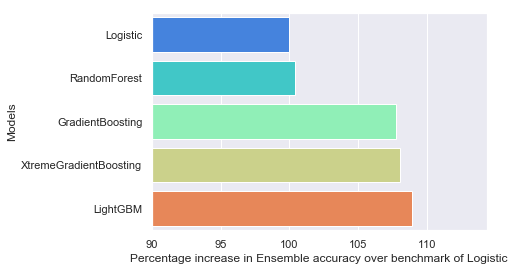

In [120]:
#Accuracy of ensemble model when additional models are added to it
Logistic = 100
Logistic_RF = Logistic * 1.00390079
Logistic_RF_GBM = Logistic_RF * 1.07371730
Logistic_RF_GBM_XGB = Logistic_RF_GBM * 1.00204568
Logistic_RF_GBM_XGB_LGBM = Logistic_RF_GBM_XGB * 1.00823062
Impact = pd.DataFrame([Logistic,Logistic_RF,Logistic_RF_GBM,Logistic_RF_GBM_XGB,Logistic_RF_GBM_XGB_LGBM])
Impact['Models'] = ['Logistic', 'RandomForest', 'GradientBoosting', 'XtremeGradientBoosting', 'LightGBM' ]
Impact.columns = ['Contribution', 'Models']

g = sns.barplot(y="Models", x="Contribution", data=Impact, palette="rainbow")
g.set(xlim=(90, None))
g.set(xlabel='Percentage increase in Ensemble accuracy over benchmark of Logistic', ylabel='Models')

In [11]:
ensemble_dataset_reg_change.describe()

,rf_impact,gbm_impact,xgb_impact,lgbm_impact
count,12.000000,12.000000,12.000000,12.000000
mean,44.256530,6.783561,1.512775,1.417166
std,85.354857,10.227354,2.492521,1.417411
min,-48.265609,-0.953392,-0.976678,0.009721
25%,1.744305,0.180936,-0.000337,0.119966
50%,8.510104,1.627022,0.536663,0.873492
75%,49.386258,7.894497,1.968067,2.560982
max,235.314365,30.958582,8.142856,3.703044


[Text(0,0.5,'Models'),
 Text(0.5,0,'Percentage increase in Ensemble accuracy over benchmark of Linear')]

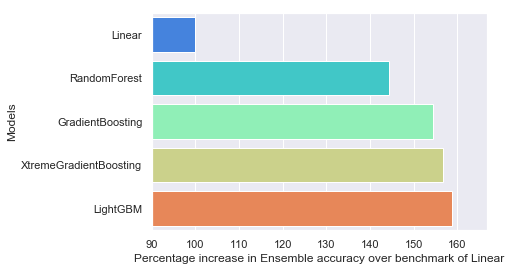

In [119]:
#Accuracy of ensemble model when additional models are added to it
Linear = 100
Linear_RF = Linear * 1.44256531
Linear_RF_GBM = Linear_RF * 1.06970308
Linear_RF_GBM_XGB = Linear_RF_GBM * 1.01479953
Linear_RF_GBM_XGB_LGBM = Linear_RF_GBM_XGB * 1.01369670
Impact = pd.DataFrame([Linear,Linear_RF,Linear_RF_GBM,Linear_RF_GBM_XGB,Linear_RF_GBM_XGB_LGBM])
Impact['Models'] = ['Linear', 'RandomForest', 'GradientBoosting', 'XtremeGradientBoosting', 'LightGBM' ]
Impact.columns = ['Contribution', 'Models']

g = sns.barplot(y="Models", x="Contribution", data=Impact, palette="rainbow")
g.set(xlim=(90, None))
g.set(xlabel='Percentage increase in Ensemble accuracy over benchmark of Linear', ylabel='Models')

In [17]:
ensemble_dataset_reg.loc[0:5].to_csv('xyz.csv')

In [18]:
ensemble_dataset_clf.loc[0:5].to_csv('pqr.csv')

[Text(0,0.5,'Percentage increase in accuracy'),
 Text(0.5,0,'Impact for regression problems')]

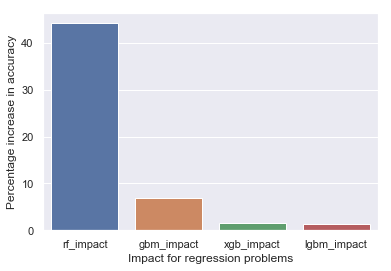

In [121]:
reg_model_contributions = ensemble_dataset_reg_change.describe()
reg_model_contributions = pd.DataFrame(reg_model_contributions.iloc[1])
reg_model_contributions['Increment'] = (reg_model_contributions).index
x = sns.barplot(y="mean", x="Increment", data=reg_model_contributions)
x.set(xlabel='Impact for regression problems', ylabel='Percentage increase in accuracy')

[Text(0,0.5,'Percentage increase in accuracy'),
 Text(0.5,0,'Impact for classification problems')]

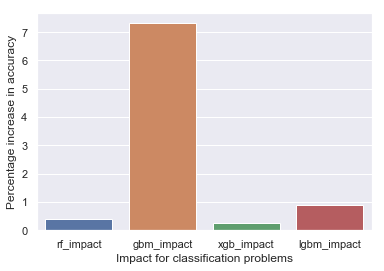

In [122]:
clf_model_contributions = ensemble_dataset_clf_change.describe()
clf_model_contributions = pd.DataFrame(clf_model_contributions.iloc[1])
clf_model_contributions['Increment'] = (clf_model_contributions).index
y = sns.barplot(y="mean", x="Increment", data=clf_model_contributions)
y.set(xlabel='Impact for classification problems', ylabel='Percentage increase in accuracy')